In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('income_KMeans.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income (5)')

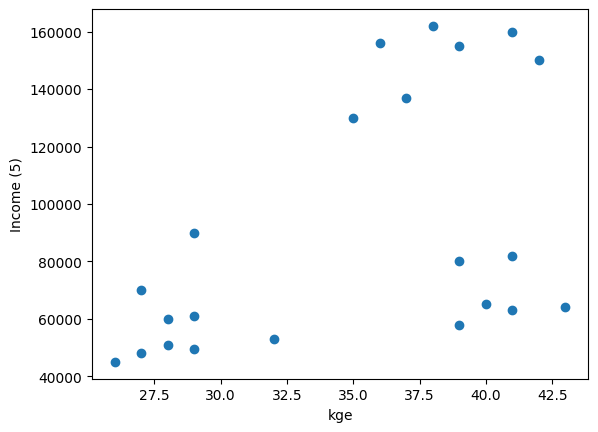

In [5]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('kge')
plt.ylabel('Income (5)')

In [7]:
kmeans = KMeans(n_clusters=3, random_state=42)
y_predicted = kmeans.fit_predict(df[['Age', 'Income($)']])
print(y_predicted)

[1 2 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 1]


In [8]:
df['Cluster'] = y_predicted
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,1
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


In [13]:
kmeans.cluster_centers_


array([[3.82857143e+01, 1.50000000e+05],
       [3.24166667e+01, 5.72916667e+04],
       [3.63333333e+01, 8.40000000e+04]])

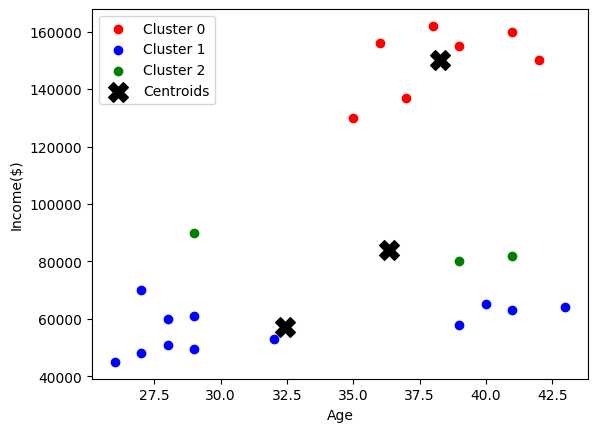

In [14]:
df1=df[df.Cluster==0]
df2=df[df.Cluster==1]
df3=df[df.Cluster==2]


plt.scatter(df1['Age'], df1['Income($)'], color='red', label='Cluster 0')
plt.scatter(df2['Age'], df2['Income($)'], color='blue', label='Cluster 1')
plt.scatter(df3['Age'], df3['Income($)'], color='green', label='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='X', s=200, label='Centroids')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()
plt.show()


In [15]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

df.head()


,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


Text(0, 0.5, 'Income (5)')

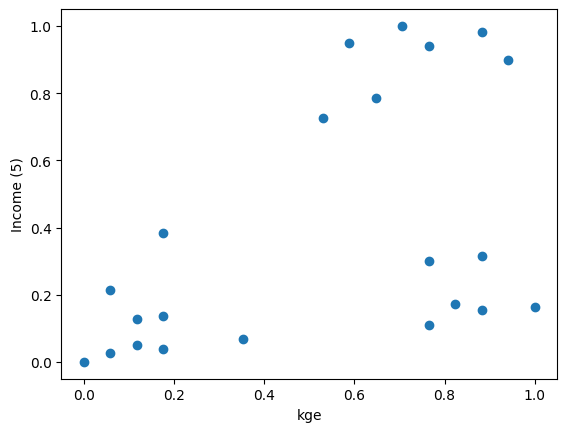

In [16]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('kge')
plt.ylabel('Income (5)')

In [20]:
kmeans = KMeans(n_clusters=3, random_state=42)
y_predicted = kmeans.fit_predict(df[['Age', 'Income($)']])
print(y_predicted)

[1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 2]


In [21]:
df['Cluster'] = y_predicted
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [22]:
kmeans.cluster_centers_


array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

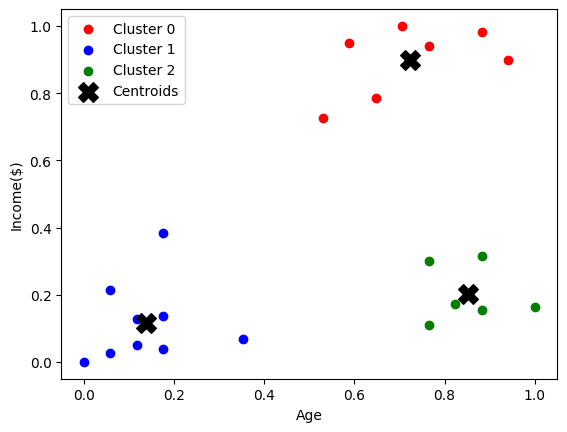

In [23]:
df1=df[df.Cluster==0]
df2=df[df.Cluster==1]
df3=df[df.Cluster==2]


plt.scatter(df1['Age'], df1['Income($)'], color='red', label='Cluster 0')
plt.scatter(df2['Age'], df2['Income($)'], color='blue', label='Cluster 1')
plt.scatter(df3['Age'], df3['Income($)'], color='green', label='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='X', s=200, label='Centroids')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()
plt.show()


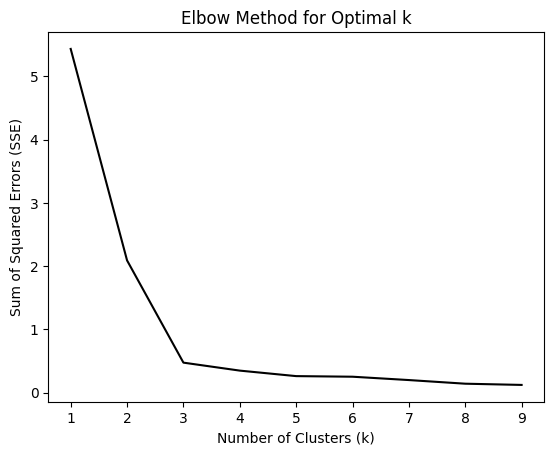

In [24]:
sse = []
k_rng = range(1, 10)

for k in k_rng:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[['Age', 'Income($)']])
    sse.append(kmeans.inertia_)

plt.plot(k_rng, sse, color="black")
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()
